In [1]:
#all imports
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('forPredictions/2026predictedparkingdata_streamlined.csv')
df.head()



,Date,DayOfWeek,LOT 2 General % Capacity,LOT 2 General Occupied,LOT 2 General Spaces,LOT 2 Premium % Capacity,LOT 2 Premium Occupied,LOT 2 Premium Spaces,LOT 3 % Capacity,LOT 3 Occupied,...,LOT 4 General Spaces,LOT 4 Premium % Capacity,LOT 4 Premium Occupied,LOT 4 Premium Spaces,LOT 5 % Capacity,LOT 5 Occupied,LOT 5 Spaces,LOT 6 % Capacity,LOT 6 Occupied,LOT 6 Spaces
0,1/1/2026,Thursday,0.272858,331,1214,0.613175,212,345,0.602217,718,...,1430,0.933971,327,350,0.398133,914,2296,0.447258,598,1337
1,1/2/2026,Friday,0.293735,357,1214,0.613715,212,345,0.633617,755,...,1430,0.934277,327,350,0.419864,964,2296,0.462998,619,1337
2,1/3/2026,Saturday,0.282792,343,1214,0.547370,189,345,0.642578,766,...,1430,0.903237,316,350,0.436942,1003,2296,0.465544,622,1337
3,1/4/2026,Sunday,0.303669,369,1214,0.547910,189,345,0.673977,803,...,1430,0.903543,316,350,0.458674,1053,2296,0.481284,643,1337
4,1/5/2026,Monday,0.216726,263,1214,0.630613,218,345,0.513934,613,...,1430,0.933004,327,350,0.338861,778,2296,0.405269,542,1337


In [31]:
facility_avg = df['Total % Capacity'].mean() * 100
print(f"Facility Average Occupancy: {facility_avg:.2f}%")

Facility Average Occupancy: 59.47%


In [21]:
# Lot columns
lot_occ_cols = [
    'LOT 2 General Occupied', 'LOT 2 Premium Occupied',
    'LOT 3 Occupied', 'LOT 4 General Occupied',
    'LOT 4 Premium Occupied', 'LOT 5 Occupied',
    'LOT 6 Occupied'
]

lot_space_cols = [
    'LOT 2 General Spaces', 'LOT 2 Premium Spaces',
    'LOT 3 Spaces', 'LOT 4 General Spaces',
    'LOT 4 Premium Spaces', 'LOT 5 Spaces',
    'LOT 6 Spaces'
]

# Total facility occupancy %
total_occ = df[lot_occ_cols].sum().sum()
total_space = df[lot_space_cols].sum().sum()
facility_pct = total_occ / total_space * 100

print(f"Total Facility Average Occupancy: {facility_pct:.2f}%")


Total Facility Average Occupancy: 59.47%


In [25]:
r = df.sample(n=10)
r

,Date,DayOfWeek,LOT 2 General % Capacity,LOT 2 General Occupied,LOT 2 General Spaces,LOT 2 Premium % Capacity,LOT 2 Premium Occupied,LOT 2 Premium Spaces,LOT 3 % Capacity,LOT 3 Occupied,...,LOT 4 General Spaces,LOT 4 Premium % Capacity,LOT 4 Premium Occupied,LOT 4 Premium Spaces,LOT 5 % Capacity,LOT 5 Occupied,LOT 5 Spaces,LOT 6 % Capacity,LOT 6 Occupied,LOT 6 Spaces
124,5/5/2026,Tuesday,0.681668,828,1214,0.773631,267,345,0.523122,624,...,1430,0.938616,329,350,0.439683,1010,2296,0.501533,671,1337
31,2/1/2026,Sunday,0.237390,288,1214,0.547784,189,345,0.682564,814,...,1430,0.905553,317,350,0.454125,1043,2296,0.468770,627,1337
97,4/8/2026,Wednesday,0.593153,720,1214,0.743316,256,345,0.561554,669,...,1430,0.937584,328,350,0.443123,1017,2296,0.498449,666,1337
39,2/9/2026,Monday,0.156946,191,1214,0.649546,224,345,0.528436,630,...,1430,0.934966,327,350,0.340236,781,2296,0.397986,532,1337
340,12/7/2026,Monday,0.743347,902,1214,0.922328,318,345,0.522719,623,...,1430,0.950220,333,350,0.472400,1085,2296,0.507899,679,1337
131,5/12/2026,Tuesday,0.688167,835,1214,0.792689,273,345,0.529038,631,...,1430,0.938568,328,350,0.445606,1023,2296,0.506763,678,1337
84,3/26/2026,Thursday,0.693305,842,1214,0.782098,270,345,0.596199,711,...,1430,0.935786,328,350,0.481250,1105,2296,0.537165,718,1337
77,3/19/2026,Thursday,0.686807,834,1214,0.763040,263,345,0.590283,704,...,1430,0.935834,328,350,0.475327,1091,2296,0.531934,711,1337
179,6/29/2026,Monday,0.620506,753,1214,0.849198,293,345,0.523972,625,...,1430,0.940130,329,350,0.437096,1004,2296,0.494202,661,1337
303,10/31/2026,Saturday,0.785796,954,1214,0.865530,299,345,0.667556,796,...,1430,0.916964,321,350,0.574508,1319,2296,0.577557,772,1337


In [27]:
len(df[df['LOT 5 % Capacity'] < 0.1])

0

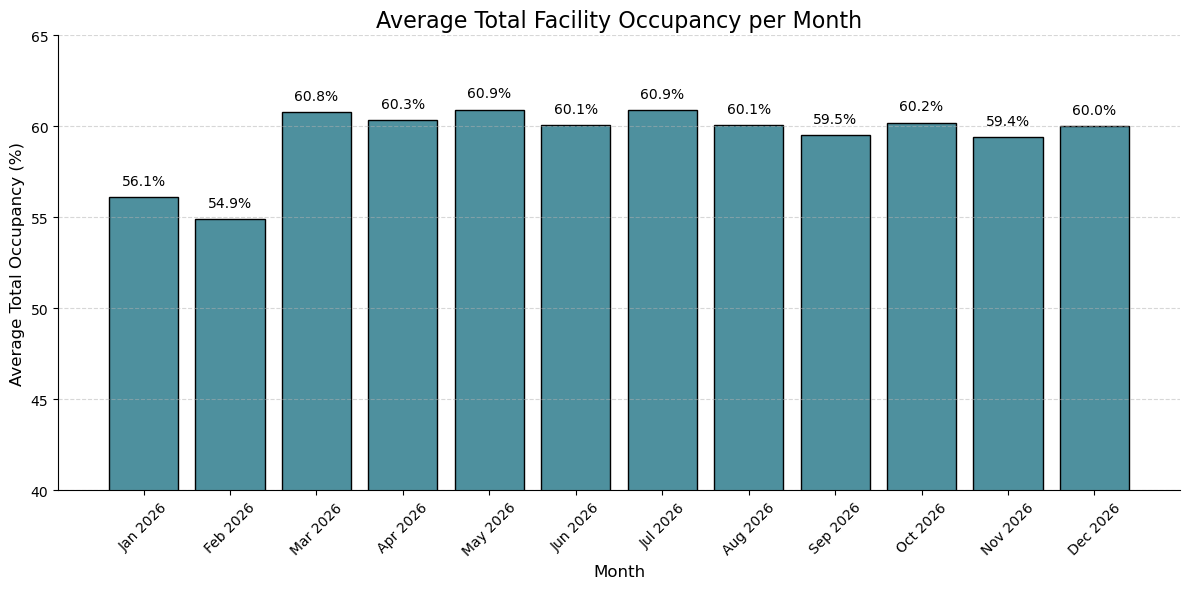

In [29]:

# --- Ensure datetime ---
df['Date'] = pd.to_datetime(df['Date'])

# --- Compute total occupancy across all lots per day ---
df['Total Occupied'] = (
    df['LOT 2 General Occupied'] + df['LOT 2 Premium Occupied'] +
    df['LOT 3 Occupied'] + df['LOT 4 General Occupied'] +
    df['LOT 4 Premium Occupied'] + df['LOT 5 Occupied'] +
    df['LOT 6 Occupied']
)

df['Total Spaces'] = (
    df['LOT 2 General Spaces'] + df['LOT 2 Premium Spaces'] +
    df['LOT 3 Spaces'] + df['LOT 4 General Spaces'] +
    df['LOT 4 Premium Spaces'] + df['LOT 5 Spaces'] +
    df['LOT 6 Spaces']
)

df['Total % Capacity'] = df['Total Occupied'] / df['Total Spaces']

# --- Group by month ---
df['Month'] = df['Date'].dt.to_period('M')
monthly_avg = df.groupby('Month')['Total % Capacity'].mean().reset_index()
monthly_avg['Month'] = monthly_avg['Month'].dt.to_timestamp()
monthly_avg['Average %'] = monthly_avg['Total % Capacity'] * 100

# --- Plot ---
plt.figure(figsize=(12, 6))
bars = plt.bar(
    monthly_avg['Month'].dt.strftime('%b %Y'),
    monthly_avg['Average %'],
    color='#4e909e',
    edgecolor='black'
)

# --- Add percentage labels ---
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.5,
        f'{height:.1f}%',
        ha='center',
        va='bottom',
        fontsize=10
    )

# --- Styling ---
plt.title("Average Total Facility Occupancy per Month", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Average Total Occupancy (%)", fontsize=12)
plt.xticks(rotation=45)
sns.despine()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.ylim(40, 65)

# --- Save figure ---
plt.savefig(
    "avg_monthly_total_occupancy.png",
    dpi=300,
    bbox_inches='tight'
)

plt.show()


In [33]:
import pandas as pd
import numpy as np

# --- Copy base DataFrame ---
df_hypo = df.copy()

# --- Ensure datetime ---
df_hypo['Date'] = pd.to_datetime(df_hypo['Date'])

# --- Define month multipliers relative to January ---
# Jan = 0%, Feb = +1%, Mar = +2%, etc.
month_increase = {
    1: 0.00,  # January
    2: 0.02,  # February
    3: 0.04,
    4: 0.06,
    5: 0.08,
    6: 0.1,
    7: 0.12,
    8: 0.14,
    9: 0.16,
    10: 0.18,
    11: 0.2,
    12: 0.22
}

# --- Apply month multiplier ---
df_hypo['Month'] = df_hypo['Date'].dt.month
df_hypo['Multiplier'] = df_hypo['Month'].map(month_increase)

# --- Identify occupancy and capacity columns ---
occ_cols = [col for col in df_hypo.columns if "Occupied" in col]
space_cols = [col for col in df_hypo.columns if "Spaces" in col]
pct_cols = [col for col in df_hypo.columns if "% Capacity" in col]

# --- Adjust occupied counts based on month multiplier ---
for col in occ_cols:
    df_hypo[col] = df_hypo[col] * (1 + df_hypo['Multiplier'])

# --- Recalculate % capacity columns ---
for col in pct_cols:
    # find corresponding occupied + space columns
    base_name = col.split('% Capacity')[0].strip()
    occ_col = next((c for c in occ_cols if base_name in c), None)
    space_col = next((c for c in space_cols if base_name in c), None)
    
    if occ_col and space_col:
        df_hypo[col] = df_hypo[occ_col] / df_hypo[space_col]

# --- Drop helper columns ---
df_hypo = df_hypo.drop(columns=['Month', 'Multiplier'])

# --- Verify change ---
df_hypo['Total Occupied'] = (
    df_hypo['LOT 2 General Occupied'] + df_hypo['LOT 2 Premium Occupied'] +
    df_hypo['LOT 3 Occupied'] + df_hypo['LOT 4 General Occupied'] +
    df_hypo['LOT 4 Premium Occupied'] + df_hypo['LOT 5 Occupied'] +
    df_hypo['LOT 6 Occupied']
)
df_hypo['Total Spaces'] = (
    df_hypo['LOT 2 General Spaces'] + df_hypo['LOT 2 Premium Spaces'] +
    df_hypo['LOT 3 Spaces'] + df_hypo['LOT 4 General Spaces'] +
    df_hypo['LOT 4 Premium Spaces'] + df_hypo['LOT 5 Spaces'] +
    df_hypo['LOT 6 Spaces']
)
df_hypo['Total % Capacity'] = df_hypo['Total Occupied'] / df_hypo['Total Spaces']

# --- Check average monthly change ---
monthly_check = (
    df_hypo
    .assign(Month=df_hypo['Date'].dt.to_period('M'))
    .groupby('Month')['Total % Capacity']
    .mean()
    .reset_index()
)
monthly_check['Month'] = monthly_check['Month'].dt.strftime('%b')
print(monthly_check)


   Month  Total % Capacity
0    Jan          0.561292
1    Feb          0.560172
2    Mar          0.632254
3    Apr          0.639506
4    May          0.657963
5    Jun          0.660665
6    Jul          0.681805
7    Aug          0.684953
8    Sep          0.690264
9    Oct          0.710432
10   Nov          0.712832
11   Dec          0.732051


In [35]:
df_hypo.tail()

,Date,DayOfWeek,LOT 2 General % Capacity,LOT 2 General Occupied,LOT 2 General Spaces,LOT 2 Premium % Capacity,LOT 2 Premium Occupied,LOT 2 Premium Spaces,LOT 3 % Capacity,LOT 3 Occupied,...,LOT 4 Premium Spaces,LOT 5 % Capacity,LOT 5 Occupied,LOT 5 Spaces,LOT 6 % Capacity,LOT 6 Occupied,LOT 6 Spaces,Total Occupied,Total Spaces,Total % Capacity
360,2026-12-27,Sunday,1.037100,1259.04,1214,1.092696,376.98,345,0.854614,1018.70,...,350,0.744434,1709.22,2296,0.731818,978.44,1337,6164.66,8164,0.755103
361,2026-12-28,Monday,0.930577,1129.72,1214,1.195246,412.36,345,0.659128,785.68,...,350,0.597779,1372.50,2296,0.638743,854.00,1337,5807.20,8164,0.711318
362,2026-12-29,Tuesday,0.955700,1160.22,1214,1.195246,412.36,345,0.698020,832.04,...,350,0.624347,1433.50,2296,0.657906,879.62,1337,5958.48,8164,0.729848
363,2026-12-30,Wednesday,0.981829,1191.94,1214,1.195246,412.36,345,0.735889,877.18,...,350,0.650915,1494.50,2296,0.677068,905.24,1337,6109.76,8164,0.748378
364,2026-12-31,Thursday,1.006952,1222.44,1214,1.195246,412.36,345,0.774782,923.54,...,350,0.677483,1555.50,2296,0.696230,930.86,1337,6261.04,8164,0.766908


In [37]:
df.tail()

,Date,DayOfWeek,LOT 2 General % Capacity,LOT 2 General Occupied,LOT 2 General Spaces,LOT 2 Premium % Capacity,LOT 2 Premium Occupied,LOT 2 Premium Spaces,LOT 3 % Capacity,LOT 3 Occupied,...,LOT 5 % Capacity,LOT 5 Occupied,LOT 5 Spaces,LOT 6 % Capacity,LOT 6 Occupied,LOT 6 Spaces,Total Occupied,Total Spaces,Total % Capacity,Month
360,2026-12-27,Sunday,0.849786,1032,1214,0.896799,309,345,0.700511,835,...,0.609982,1401,2296,0.599606,802,1337,5053,8164,0.618937,2026-12
361,2026-12-28,Monday,0.762842,926,1214,0.979503,338,345,0.540467,644,...,0.490170,1125,2296,0.523591,700,1337,4760,8164,0.583048,2026-12
362,2026-12-29,Tuesday,0.783719,951,1214,0.980043,338,345,0.571867,682,...,0.511901,1175,2296,0.539331,721,1337,4884,8164,0.598236,2026-12
363,2026-12-30,Wednesday,0.804596,977,1214,0.980583,338,345,0.603267,719,...,0.533633,1225,2296,0.555071,742,1337,5008,8164,0.613425,2026-12
364,2026-12-31,Thursday,0.825473,1002,1214,0.981123,338,345,0.634667,757,...,0.555365,1275,2296,0.570811,763,1337,5132,8164,0.628613,2026-12


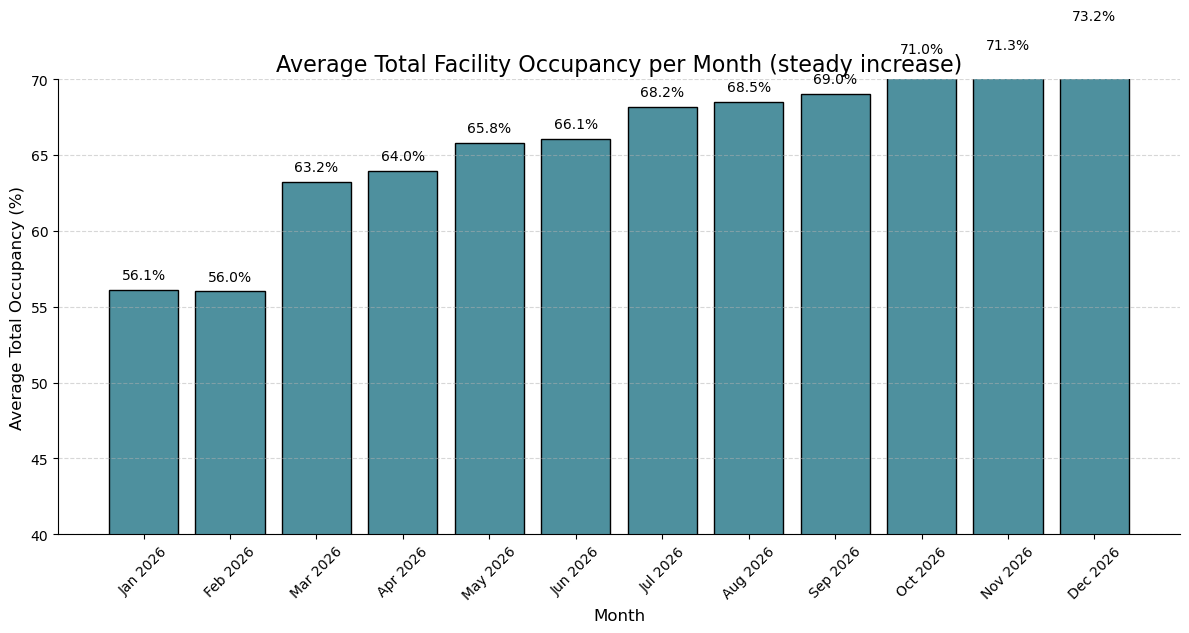

In [39]:

# --- Ensure datetime ---
df_hypo['Date'] = pd.to_datetime(df_hypo['Date'])

# --- Compute total occupancy across all lots per day ---
df_hypo['Total Occupied'] = (
    df_hypo['LOT 2 General Occupied'] + df_hypo['LOT 2 Premium Occupied'] +
    df_hypo['LOT 3 Occupied'] + df_hypo['LOT 4 General Occupied'] +
    df_hypo['LOT 4 Premium Occupied'] + df_hypo['LOT 5 Occupied'] +
    df_hypo['LOT 6 Occupied']
)

df_hypo['Total Spaces'] = (
    df_hypo['LOT 2 General Spaces'] + df_hypo['LOT 2 Premium Spaces'] +
    df_hypo['LOT 3 Spaces'] + df_hypo['LOT 4 General Spaces'] +
    df_hypo['LOT 4 Premium Spaces'] + df_hypo['LOT 5 Spaces'] +
    df_hypo['LOT 6 Spaces']
)

df_hypo['Total % Capacity'] = df_hypo['Total Occupied'] / df_hypo['Total Spaces']

# --- Group by month ---
df_hypo['Month'] = df_hypo['Date'].dt.to_period('M')
monthly_avg = df_hypo.groupby('Month')['Total % Capacity'].mean().reset_index()
monthly_avg['Month'] = monthly_avg['Month'].dt.to_timestamp()
monthly_avg['Average %'] = monthly_avg['Total % Capacity'] * 100

# --- Plot ---
plt.figure(figsize=(12, 6))
bars = plt.bar(
    monthly_avg['Month'].dt.strftime('%b %Y'),
    monthly_avg['Average %'],
    color='#4e909e',
    edgecolor='black'
)

# --- Add percentage labels ---
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.5,
        f'{height:.1f}%',
        ha='center',
        va='bottom',
        fontsize=10
    )

# --- Styling ---
plt.title("Average Total Facility Occupancy per Month (steady increase)", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Average Total Occupancy (%)", fontsize=12)
plt.xticks(rotation=45)
sns.despine()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.ylim(40, 70)

# --- Save figure ---
plt.savefig(
    "avg_monthly_total_occupancy.png",
    dpi=300,
    bbox_inches='tight'
)

plt.show()


In [40]:
# --- Ensure datetime in both ---
df['Date'] = pd.to_datetime(df['Date'])
df_hypo['Date'] = pd.to_datetime(df_hypo['Date'])

# --- Compute total % capacity per month for original df ---
df['Total Occupied'] = (
    df['LOT 2 General Occupied'] + df['LOT 2 Premium Occupied'] +
    df['LOT 3 Occupied'] + df['LOT 4 General Occupied'] +
    df['LOT 4 Premium Occupied'] + df['LOT 5 Occupied'] +
    df['LOT 6 Occupied']
)
df['Total Spaces'] = (
    df['LOT 2 General Spaces'] + df['LOT 2 Premium Spaces'] +
    df['LOT 3 Spaces'] + df['LOT 4 General Spaces'] +
    df['LOT 4 Premium Spaces'] + df['LOT 5 Spaces'] +
    df['LOT 6 Spaces']
)
df['Total % Capacity'] = df['Total Occupied'] / df['Total Spaces']
monthly_orig = df.groupby(df['Date'].dt.to_period('M'))['Total % Capacity'].mean().reset_index()
monthly_orig['Month'] = monthly_orig['Date'].dt.to_timestamp()

# --- Compute total % capacity per month for hypothetical df ---
df_hypo['Total Occupied'] = (
    df_hypo['LOT 2 General Occupied'] + df_hypo['LOT 2 Premium Occupied'] +
    df_hypo['LOT 3 Occupied'] + df_hypo['LOT 4 General Occupied'] +
    df_hypo['LOT 4 Premium Occupied'] + df_hypo['LOT 5 Occupied'] +
    df_hypo['LOT 6 Occupied']
)
df_hypo['Total Spaces'] = (
    df_hypo['LOT 2 General Spaces'] + df_hypo['LOT 2 Premium Spaces'] +
    df_hypo['LOT 3 Spaces'] + df_hypo['LOT 4 General Spaces'] +
    df_hypo['LOT 4 Premium Spaces'] + df_hypo['LOT 5 Spaces'] +
    df_hypo['LOT 6 Spaces']
)
df_hypo['Total % Capacity'] = df_hypo['Total Occupied'] / df_hypo['Total Spaces']
monthly_hypo = df_hypo.groupby(df_hypo['Date'].dt.to_period('M'))['Total % Capacity'].mean().reset_index()
monthly_hypo['Month'] = monthly_hypo['Date'].dt.to_timestamp()

# --- Merge and compute percent difference ---
monthly_compare = monthly_orig.merge(
    monthly_hypo,
    on='Month',
    suffixes=('_orig', '_hypo')
)

monthly_compare['Percent Diff'] = (
    (monthly_compare['Total % Capacity_hypo'] - monthly_compare['Total % Capacity_orig'])
    / monthly_compare['Total % Capacity_orig'] * 100
)

# --- Display ---
monthly_compare[['Month', 'Total % Capacity_orig', 'Total % Capacity_hypo', 'Percent Diff']]


,Month,Total % Capacity_orig,Total % Capacity_hypo,Percent Diff
0,2026-01-01,0.561292,0.561292,0.0
1,2026-02-01,0.549188,0.560172,2.0
2,2026-03-01,0.607936,0.632254,4.0
3,2026-04-01,0.603307,0.639506,6.0
4,2026-05-01,0.609225,0.657963,8.0
5,2026-06-01,0.600604,0.660665,10.0
6,2026-07-01,0.608754,0.681805,12.0
7,2026-08-01,0.600836,0.684953,14.0
8,2026-09-01,0.595056,0.690264,16.0
9,2026-10-01,0.602061,0.710432,18.0


[1 2 3 4]
[0 5 6]
[0 1 2 3 4]
[5 6]
[0 1 3 4]
[2 5 6]
[0 1 4]
[2 3 5 6]


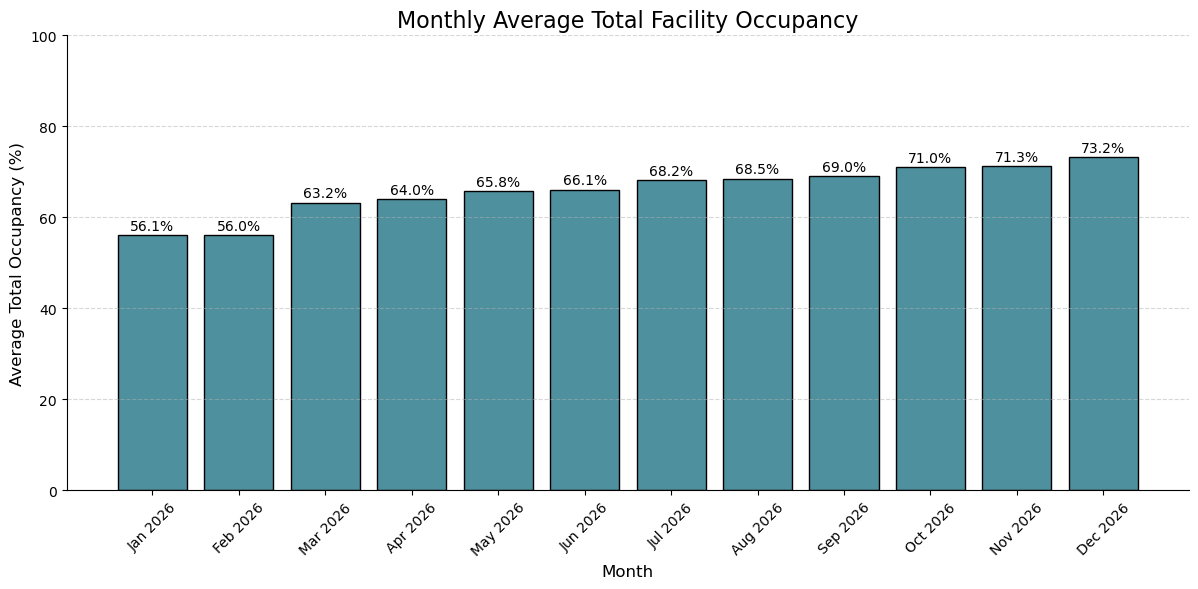

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Copy your dataframe ---
df_hypo_converge = df_hypo.copy()
df_hypo_converge['Date'] = pd.to_datetime(df_hypo_converge['Date'])

# --- Optional: define lot columns if needed ---
lot_occ_cols = [
    'LOT 2 General Occupied', 'LOT 2 Premium Occupied',
    'LOT 3 Occupied', 'LOT 4 General Occupied',
    'LOT 4 Premium Occupied', 'LOT 5 Occupied',
    'LOT 6 Occupied'
]

lot_space_cols = [
    'LOT 2 General Spaces', 'LOT 2 Premium Spaces',
    'LOT 3 Spaces', 'LOT 4 General Spaces',
    'LOT 4 Premium Spaces', 'LOT 5 Spaces',
    'LOT 6 Spaces'
]

# --- Your occupancy calculation goes here ---
# e.g., you might adjust lot occupancies or total % capacity
# df_plot['Total % Capacity'] = ...

strength = 0.0005

# --- Compute space ratios once ---
spaces_array = df_hypo_converge[lot_space_cols].iloc[0].values  # assuming lot spaces are constant per lot
space_ratios = spaces_array / spaces_array.sum()  # ratio of each lot to total spaces


for i in range(len(df_hypo_converge)):
       # --- Per row adjustment based on lots above/below average ---
    occ = df_hypo_converge.loc[i, lot_occ_cols].values
    spaces = df_hypo_converge.loc[i, lot_space_cols].values
    total_occ = occ.sum()
    total_spaces = spaces.sum()
    
    # Current total % for this row
    current_total_pct = total_occ / total_spaces
    
    # --- Identify lots above/below current total % ---
    lot_pcts = occ / spaces
    above_idx = np.where(lot_pcts > current_total_pct)[0]
    below_idx = np.where(lot_pcts <= current_total_pct)[0]

    if (i % 100 == 0):
        print(above_idx)
        print(below_idx)
    
    # Count of lots above and below
    num_above = len(above_idx)
    num_below = len(below_idx)
    
    # --- Subtract 1% from each lot above average ---
    reduction = strength * spaces[above_idx]  # 1% of each lot's capacity
    occ[above_idx] -= reduction
    total_reduction = reduction.sum()
    
    # Redistribute equally among below-average lots
    if len(below_idx) > 0:
        increase_per_lot = total_reduction / len(below_idx)
        occ[below_idx] += increase_per_lot

    
    # --- Save back ---
    df_hypo_converge.loc[i, lot_occ_cols] = occ
    df_hypo_converge.loc[i, 'Total % Capacity'] = occ.sum() / total_spaces


    #increase_power
    strength += 0.0005
# --- Monthly averages ---
df_hypo_converge['Month'] = df_hypo_converge['Date'].dt.to_period('M')
monthly_avg = df_hypo_converge.groupby('Month')['Total % Capacity'].mean().reset_index()
monthly_avg['Month'] = monthly_avg['Month'].dt.to_timestamp()
monthly_avg['Average %'] = monthly_avg['Total % Capacity'] * 100

# --- Plot ---
plt.figure(figsize=(12,6))
bars = plt.bar(
    monthly_avg['Month'].dt.strftime('%b %Y'),
    monthly_avg['Average %'],
    color='#4e909e',
    edgecolor='black'
)

# Add value labels
for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height() + 0.5,
        f'{bar.get_height():.1f}%',
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.title("Monthly Average Total Facility Occupancy", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Average Total Occupancy (%)", fontsize=12)
plt.xticks(rotation=45)
sns.despine()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.ylim(0, 100)  # adjust as needed
plt.show()


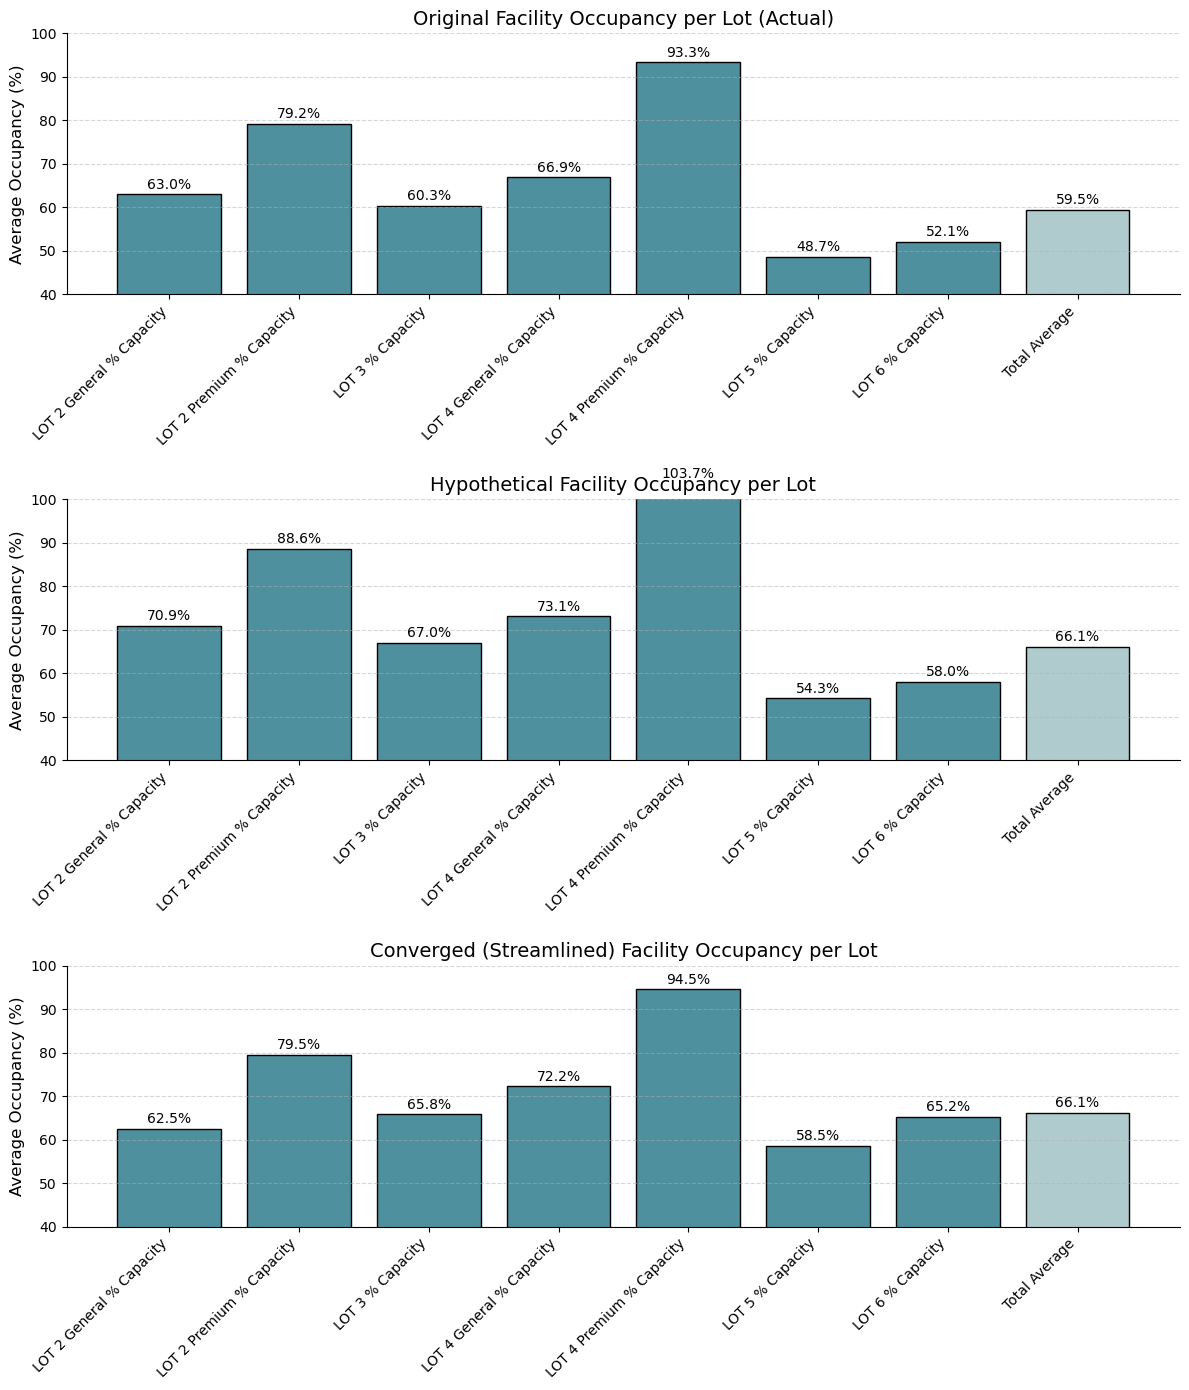

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- Helper: compute weighted yearly lot averages ---
def compute_lot_averages(df):
    lot_occ_cols = [
        'LOT 2 General Occupied', 'LOT 2 Premium Occupied',
        'LOT 3 Occupied', 'LOT 4 General Occupied',
        'LOT 4 Premium Occupied', 'LOT 5 Occupied',
        'LOT 6 Occupied'
    ]
    lot_space_cols = [
        'LOT 2 General Spaces', 'LOT 2 Premium Spaces',
        'LOT 3 Spaces', 'LOT 4 General Spaces',
        'LOT 4 Premium Spaces', 'LOT 5 Spaces',
        'LOT 6 Spaces'
    ]
    
    df = df.copy()
    df['Date'] = pd.to_datetime(df['Date'])
    
    # Compute weighted % capacity per lot across all rows
    weighted_pcts = {}
    for occ_col, space_col in zip(lot_occ_cols, lot_space_cols):
        total_occ = df[occ_col].sum()
        total_space = df[space_col].sum()
        weighted_pcts[occ_col.replace('Occupied', '% Capacity')] = (total_occ / total_space) * 100
    
    # Compute total facility % capacity correctly
    total_occ_all = df[lot_occ_cols].sum().sum()
    total_space_all = df[lot_space_cols].sum().sum()
    total_avg = (total_occ_all / total_space_all) * 100
    
    weighted_pcts['Total Average'] = total_avg
    return pd.Series(weighted_pcts)

# --- Compute averages for each dataset ---
avg_df = compute_lot_averages(df)
avg_hypo = compute_lot_averages(df_hypo)
avg_converge = compute_lot_averages(df_hypo_converge)

# --- Plot setup ---
fig, axes = plt.subplots(3, 1, figsize=(12, 14), sharey=True)

datasets = [
    (avg_df, "Original Facility Occupancy per Lot (Actual)"),
    (avg_hypo, "Hypothetical Facility Occupancy per Lot"),
    (avg_converge, "Converged (Streamlined) Facility Occupancy per Lot")
]

bar_color = "#4e909e"
avg_color = "#b0cbce"
edge_color = "black"

for ax, (avg, title) in zip(axes, datasets):
    colors = [bar_color] * (len(avg) - 1) + [avg_color]
    bars = ax.bar(avg.index, avg.values, color=colors, edgecolor=edge_color)
    
    # Add labels
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height + 0.6,
            f'{height:.1f}%',
            ha='center', va='bottom', fontsize=10
        )
    
    # Tick labels
    ax.set_xticks([bar.get_x() + bar.get_width() / 2 for bar in bars])
    ax.set_xticklabels(avg.index, rotation=45, ha='right')
    
    ax.set_title(title, fontsize=14, fontweight='normal')
    ax.set_ylabel("Average Occupancy (%)", fontsize=12)
    ax.grid(axis='y', linestyle='--', alpha=0.5)
    sns.despine(ax=ax)
    ax.set_ylim(40, 100)

plt.tight_layout()
plt.savefig("lot_facility_comparison_yearly_with_total.png", dpi=300, bbox_inches='tight')
plt.show()


In [43]:
# Sum total occupied across all rows for original df_hypo
total_original_occ = df_hypo[lot_occ_cols].sum().sum()

# Sum total occupied across all rows for df_hypo_converge
total_converge_occ = df_hypo_converge[lot_occ_cols].sum().sum()

print(f"Total occupied in original df_hypo: {total_original_occ}")
print(f"Total occupied in df_hypo_converge: {total_converge_occ}")
print(f"Difference: {total_converge_occ - total_original_occ}")

Total occupied in original df_hypo: 1969696.02
Total occupied in df_hypo_converge: 1969696.02
Difference: 0.0


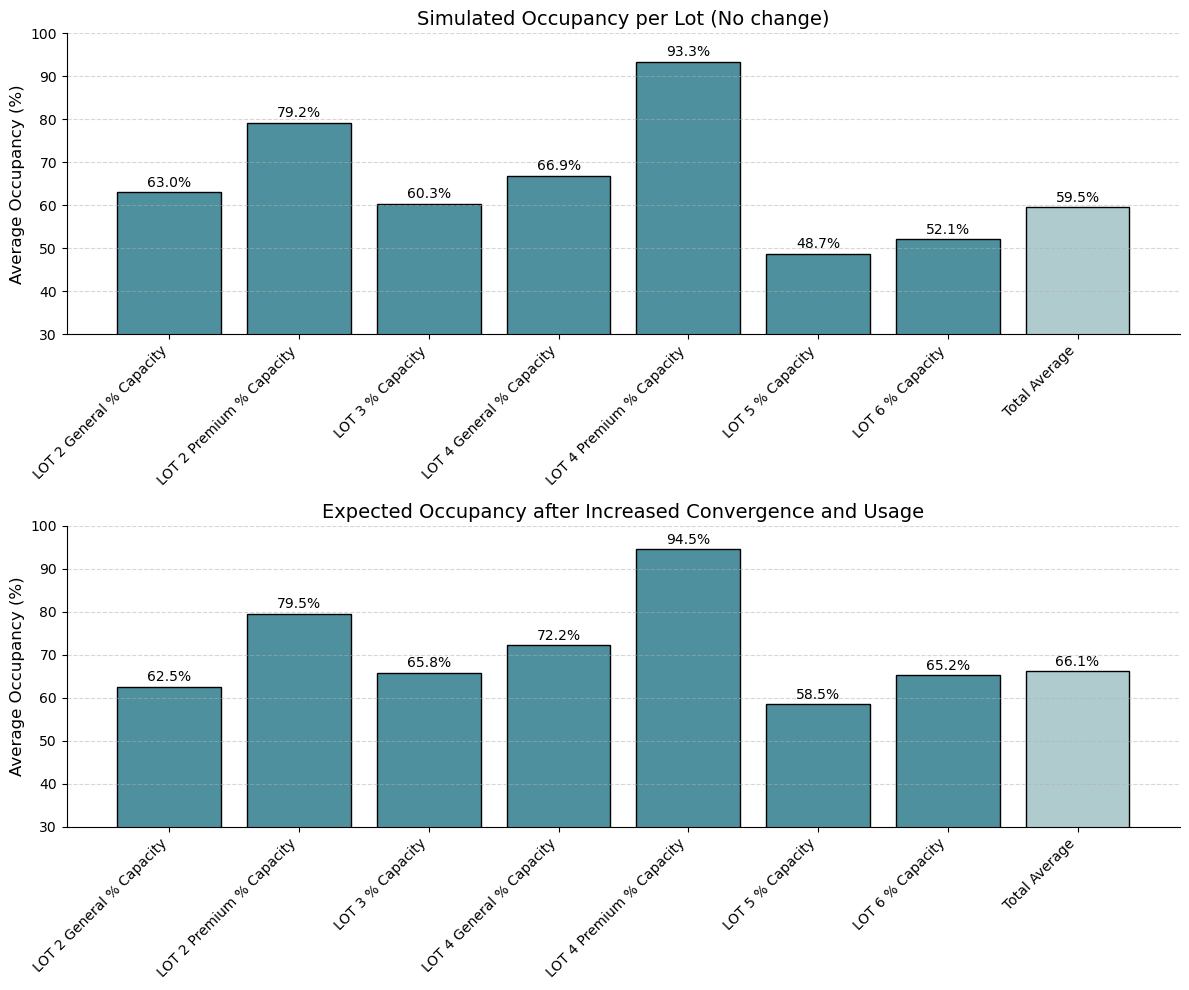

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Helper: compute weighted yearly lot averages ---
def compute_lot_averages(df):
    lot_occ_cols = [
        'LOT 2 General Occupied', 'LOT 2 Premium Occupied',
        'LOT 3 Occupied', 'LOT 4 General Occupied',
        'LOT 4 Premium Occupied', 'LOT 5 Occupied',
        'LOT 6 Occupied'
    ]
    lot_space_cols = [
        'LOT 2 General Spaces', 'LOT 2 Premium Spaces',
        'LOT 3 Spaces', 'LOT 4 General Spaces',
        'LOT 4 Premium Spaces', 'LOT 5 Spaces',
        'LOT 6 Spaces'
    ]
    
    df = df.copy()
    df['Date'] = pd.to_datetime(df['Date'])
    
    # Compute weighted % capacity per lot
    weighted_pcts = {}
    for occ_col, space_col in zip(lot_occ_cols, lot_space_cols):
        total_occ = df[occ_col].sum()
        total_space = df[space_col].sum()
        weighted_pcts[occ_col.replace('Occupied', '% Capacity')] = (total_occ / total_space) * 100
    
    # Compute total facility % capacity
    total_occ_all = df[lot_occ_cols].sum().sum()
    total_space_all = df[lot_space_cols].sum().sum()
    weighted_pcts['Total Average'] = (total_occ_all / total_space_all) * 100
    
    return pd.Series(weighted_pcts)

# --- Compute averages for the two datasets ---
avg_df = compute_lot_averages(df)
avg_converge = compute_lot_averages(df_hypo_converge)

# --- Plot setup ---
fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharey=True)

datasets = [
    (avg_df, "Simulated Occupancy per Lot (No change)"),
    (avg_converge, "Expected Occupancy after Increased Convergence and Usage")
]

bar_color = "#4e909e"
avg_color = "#b0cbce"
edge_color = "black"

for ax, (avg, title) in zip(axes, datasets):
    colors = [bar_color] * (len(avg) - 1) + [avg_color]
    bars = ax.bar(avg.index, avg.values, color=colors, edgecolor=edge_color)
    
    # Add labels
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height + 0.6,
            f'{height:.1f}%',
            ha='center', va='bottom', fontsize=10
        )
    
    # Tick labels
    ax.set_xticks([bar.get_x() + bar.get_width() / 2 for bar in bars])
    ax.set_xticklabels(avg.index, rotation=45, ha='right')
    
    ax.set_title(title, fontsize=14, fontweight='normal')
    ax.set_ylabel("Average Occupancy (%)", fontsize=12)
    ax.grid(axis='y', linestyle='--', alpha=0.5)
    sns.despine(ax=ax)
    ax.set_ylim(30, 100)

plt.tight_layout()
plt.savefig("lot_facility_comparison_actual_vs_expected.png", dpi=300, bbox_inches='tight')
plt.show()


<Figure size 1200x600 with 0 Axes>

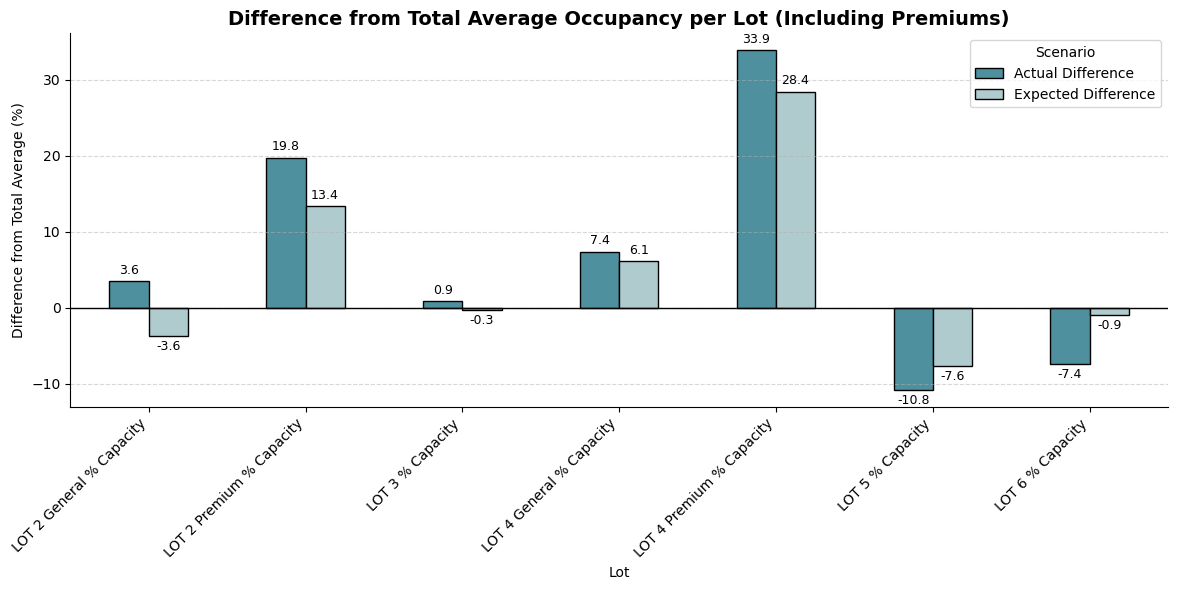

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Helper: compute weighted yearly lot averages (including Premiums) ---
def compute_lot_averages(df):
    lot_occ_cols = [
        'LOT 2 General Occupied', 'LOT 2 Premium Occupied',
        'LOT 3 Occupied', 'LOT 4 General Occupied',
        'LOT 4 Premium Occupied', 'LOT 5 Occupied',
        'LOT 6 Occupied'
    ]
    lot_space_cols = [
        'LOT 2 General Spaces', 'LOT 2 Premium Spaces',
        'LOT 3 Spaces', 'LOT 4 General Spaces',
        'LOT 4 Premium Spaces', 'LOT 5 Spaces',
        'LOT 6 Spaces'
    ]
    
    df = df.copy()
    df['Date'] = pd.to_datetime(df['Date'])
    
    weighted_pcts = {}
    for occ_col, space_col in zip(lot_occ_cols, lot_space_cols):
        total_occ = df[occ_col].sum()
        total_space = df[space_col].sum()
        weighted_pcts[occ_col.replace('Occupied', '% Capacity')] = (total_occ / total_space) * 100
    
    total_occ_all = df[lot_occ_cols].sum().sum()
    total_space_all = df[lot_space_cols].sum().sum()
    weighted_pcts['Total Average'] = (total_occ_all / total_space_all) * 100
    
    return pd.Series(weighted_pcts)

# --- Compute averages for both datasets ---
avg_actual = compute_lot_averages(df)
avg_expected = compute_lot_averages(df_hypo_converge)

# --- Compute differences from each dataset’s total average ---
def compute_diff_from_total(avg_series):
    total = avg_series['Total Average']
    diffs = avg_series.drop('Total Average') - total
    return diffs

diff_actual = compute_diff_from_total(avg_actual)
diff_expected = compute_diff_from_total(avg_expected)

# --- Prepare combined DataFrame for plotting ---
diff_df = pd.DataFrame({
    'Actual Difference': diff_actual,
    'Expected Difference': diff_expected
})

# --- Plot setup ---
plt.figure(figsize=(12, 6))
ax = diff_df.plot(kind='bar', figsize=(12, 6), color=['#4e909e', '#b0cbce'], edgecolor='black')

plt.axhline(0, color='black', linewidth=1)
plt.title("Difference from Total Average Occupancy per Lot (Including Premiums)", fontsize=14, weight='bold')
plt.ylabel("Difference from Total Average (%)")
plt.xlabel("Lot")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Scenario", loc='upper right')
sns.despine()
plt.grid(axis='y', linestyle='--', alpha=0.5)

# --- Add labels on top of bars ---
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', label_type='edge', fontsize=9, padding=3)

plt.tight_layout()
plt.savefig("lot_facility_difference_from_total_avg.png", dpi=300, bbox_inches='tight')
plt.show()


In [46]:
df_hypo_converge.to_csv('idealoccupations.csv', index=False)

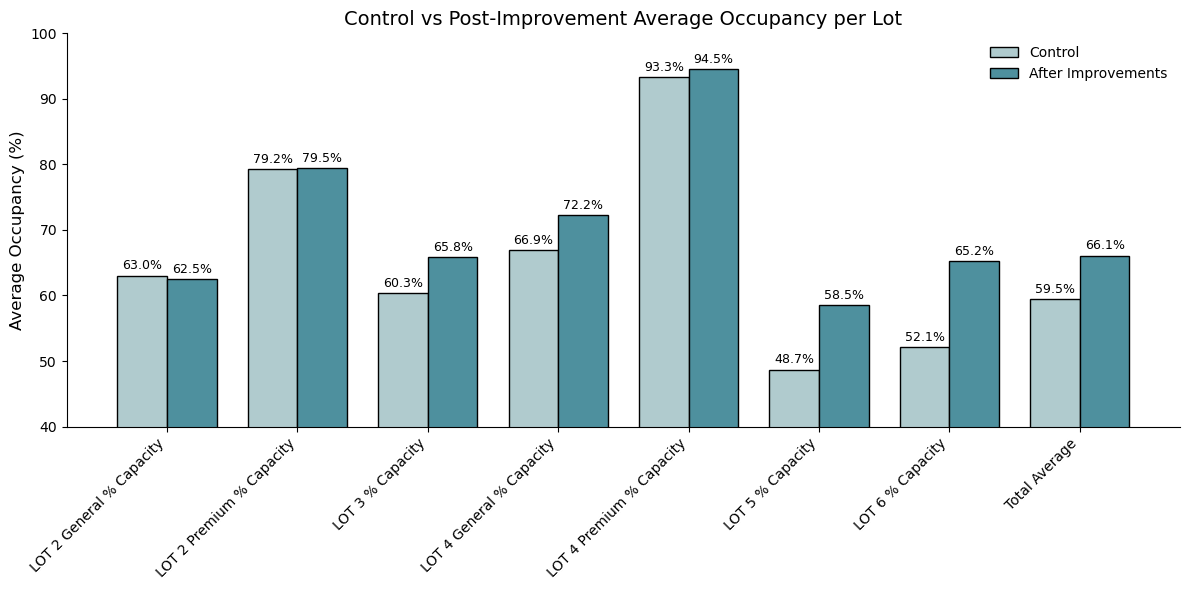

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- Helper: compute weighted yearly lot averages ---
def compute_lot_averages(df):
    lot_occ_cols = [
        'LOT 2 General Occupied', 'LOT 2 Premium Occupied',
        'LOT 3 Occupied', 'LOT 4 General Occupied',
        'LOT 4 Premium Occupied', 'LOT 5 Occupied',
        'LOT 6 Occupied'
    ]
    lot_space_cols = [
        'LOT 2 General Spaces', 'LOT 2 Premium Spaces',
        'LOT 3 Spaces', 'LOT 4 General Spaces',
        'LOT 4 Premium Spaces', 'LOT 5 Spaces',
        'LOT 6 Spaces'
    ]
    
    df = df.copy()
    df['Date'] = pd.to_datetime(df['Date'])
    
    # Compute weighted % capacity per lot
    weighted_pcts = {}
    for occ_col, space_col in zip(lot_occ_cols, lot_space_cols):
        total_occ = df[occ_col].sum()
        total_space = df[space_col].sum()
        weighted_pcts[occ_col.replace('Occupied', '% Capacity')] = (total_occ / total_space) * 100
    
    # Compute total facility % capacity
    total_occ_all = df[lot_occ_cols].sum().sum()
    total_space_all = df[lot_space_cols].sum().sum()
    weighted_pcts['Total Average'] = (total_occ_all / total_space_all) * 100
    
    return pd.Series(weighted_pcts)

# --- Compute averages for the two datasets ---
avg_df = compute_lot_averages(df)
avg_converge = compute_lot_averages(df_hypo_converge)

# --- Prepare data for overlay plot ---
labels = avg_df.index
x = np.arange(len(labels))
width = 0.38  # bar width

fig, ax = plt.subplots(figsize=(12, 6))

bars1 = ax.bar(x - width/2, avg_df.values, width, label='Control',
               color="#b0cbce", edgecolor="black")
bars2 = ax.bar(x + width/2, avg_converge.values, width, label='After Improvements',
               color="#4e909e", edgecolor="black")

# --- Add labels above bars ---
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width()/2,
            height + 0.5,
            f'{height:.1f}%',
            ha='center', va='bottom', fontsize=9
        )

# --- Aesthetics ---
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.set_ylabel("Average Occupancy (%)", fontsize=12)
ax.set_title("Control vs Post-Improvement Average Occupancy per Lot", fontsize=14, fontweight='normal')
ax.grid(False)
ax.set_ylim(40, 100)
sns.despine(ax=ax)
ax.legend(frameon=False)

plt.tight_layout()
plt.savefig("lot_facility_comparison_overlaid.png", dpi=300, bbox_inches='tight')
plt.show()


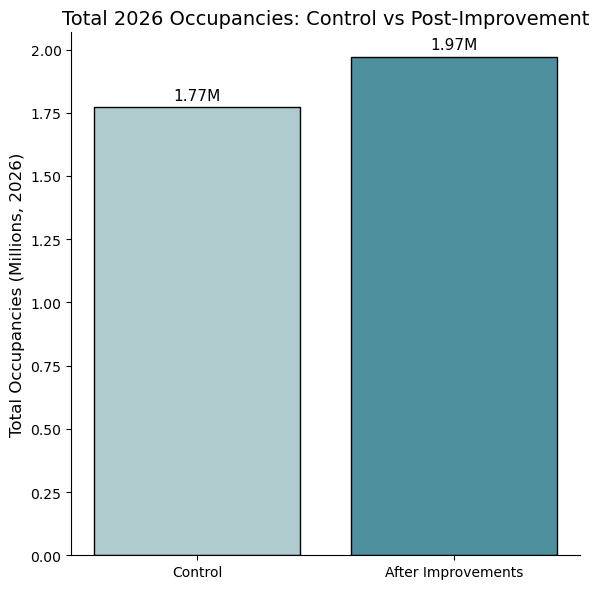

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Compute total yearly occupancies ---
def compute_total_occupancy(df):
    lot_occ_cols = [
        'LOT 2 General Occupied', 'LOT 2 Premium Occupied',
        'LOT 3 Occupied', 'LOT 4 General Occupied',
        'LOT 4 Premium Occupied', 'LOT 5 Occupied',
        'LOT 6 Occupied'
    ]
    return df[lot_occ_cols].sum().sum()

# --- Get totals ---
total_control = compute_total_occupancy(df)
total_improve = compute_total_occupancy(df_hypo_converge)

# Convert to millions for clarity
total_control_m = total_control / 1_000_000
total_improve_m = total_improve / 1_000_000

# --- Bar chart setup ---
fig, ax = plt.subplots(figsize=(6, 6))

labels = ['Control', 'After Improvements']
values = [total_control_m, total_improve_m]
colors = ["#b0cbce", "#4e909e"]

bars = ax.bar(labels, values, color=colors, edgecolor="black")

# --- Add labels above bars ---
for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height + (0.01 * height),
        f"{height:.2f}M",  # show value in millions
        ha='center', va='bottom', fontsize=11, fontweight='medium'
    )

# --- Aesthetics ---
ax.set_ylabel("Total Occupancies (Millions, 2026)", fontsize=12)
ax.set_title("Total 2026 Occupancies: Control vs Post-Improvement", fontsize=14, fontweight='normal')
ax.grid(False)
sns.despine(ax=ax)

plt.tight_layout()
plt.savefig("total_yearly_occupancies_millions.png", dpi=300, bbox_inches='tight')
plt.show()


In [79]:
df_hypo_converge.tail()

,Date,DayOfWeek,LOT 2 General % Capacity,LOT 2 General Occupied,LOT 2 General Spaces,LOT 2 Premium % Capacity,LOT 2 Premium Occupied,LOT 2 Premium Spaces,LOT 3 % Capacity,LOT 3 Occupied,...,LOT 5 % Capacity,LOT 5 Occupied,LOT 5 Spaces,LOT 6 % Capacity,LOT 6 Occupied,LOT 6 Spaces,Total Occupied,Total Spaces,Total % Capacity,Month
360,2026-12-27,Sunday,1.037100,1039.913,1214,1.092696,314.7075,345,0.854614,803.544000,...,0.744434,1895.796833,2296,0.731818,1165.016833,1337,6164.66,8164,0.755103,2026-12
361,2026-12-28,Monday,0.930577,909.986,1214,1.195246,349.9150,345,0.659128,872.062250,...,0.597779,1458.882250,2296,0.638743,940.382250,1337,5807.20,8164,0.711318,2026-12
362,2026-12-29,Tuesday,0.955700,939.879,1214,1.195246,349.7425,345,0.698020,918.660875,...,0.624347,1520.120875,2296,0.657906,966.240875,1337,5958.48,8164,0.729848,2026-12
363,2026-12-30,Wednesday,0.981829,970.992,1214,1.195246,349.5700,345,0.735889,964.039500,...,0.650915,1581.359500,2296,0.677068,992.099500,1337,6109.76,8164,0.748378,2026-12
364,2026-12-31,Thursday,1.006952,1000.885,1214,1.195246,349.3975,345,0.774782,706.000000,...,0.677483,1744.144167,2296,0.696230,1119.504167,1337,6261.04,8164,0.766908,2026-12


In [101]:
df_hypo_converge.to_csv("IDEALoccupations.csv", index = False)